In [17]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import importlib
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']
df_boston = pd.read_csv('../lesson_5/housing.csv', header=None, delimiter=r"\s+", names=column_names)
df_calif = pd.read_csv('../lesson_5/californiya.csv', header=0, delimiter=r",")



[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/pasharodaks/test/e/TES-26


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_27"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_97 (Dense)                │ (None, 32)             │           352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_98 (Dense)                │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_99 (Dense)                │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 897 (3.50 KB)

 Trainable params: 897 (3.50 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 613.7026 - mae: 22.9748 - val_loss: 532.4921 - val_mae: 21.4466
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 593.0051 - mae: 22.5245 - val_loss: 515.4949 - val_mae: 21.0521
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 574.7056 - mae: 22.1195 - val_loss: 499.3055 - val_mae: 20.6773
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 556.1230 - mae: 21.7115 - val_loss: 481.7130 - val_mae: 20.2687
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 535.3416 - mae: 21.2466 - val_loss: 461.1404 - val_mae: 19.7888
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 510.0160 - mae: 20.6633 - val_loss: 436.2570 - val_mae: 19.1865
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 480.5334 - mae: 19.9679 - val_loss: 407.7062 - val_mae: 18.4667
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 446.5159 - mae: 19.1565 - val_loss: 375.8834 - val_mae: 17.6555
Epoch 9

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 255 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 255 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/pasharodaks/test/e/TES-26/metadata
📉 MSE: 14.0042
📈 R²: 0.8090


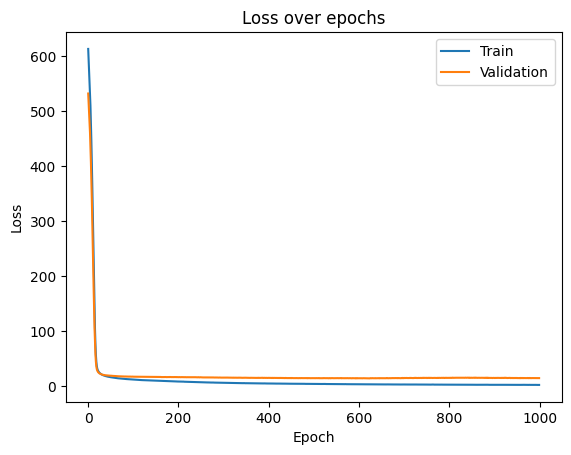

In [44]:
import neptune
from neptune_tensorflow_keras import NeptuneCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish, elu

# Инициализация Neptune
run = neptune.init_run(
    project=project, 
    api_token=api_token,
    name="Baseline Adam"
)

# Подготовка данных
X_boston = df_boston.drop("MEDV", axis=1)
y_boston = df_boston["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston)

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_boston, test_size=0.2, random_state=42
)

# Построение модели
model = Sequential([
    Dense(32, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(16, activation='relu'),
    Dense(1, activation='linear')
])

# Логирование параметров
run["parameters"] = {
    "scaler": "StandardScaler",
    "pca_components": 10,
    "test_size": 0.2,
    "optimizer": "Adam",
    "learning_rate": 0.001,
    "epochs": 1000
}

# Компиляция и логирование архитектуры
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
run["model/summary"] = str(model.summary())

# Обучение модели с NeptuneCallback
neptune_cb = NeptuneCallback(run=run, base_namespace="training")
history = model.fit(
    X_train, y_train,
    epochs=1000,
    validation_data=(X_test, y_test),
    callbacks=[neptune_cb]
)

# Предсказания и метрики
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

run["metrics/mse"] = mse
run["metrics/r2"] = r2

# Сохранение весов
model.save_weights("regression_model.weights.h5")
run["artifacts/weights"].upload("regression_model.weights.h5")

# Сохранение всей модели
model.save("regression_model.keras")
run["artifacts/model"].upload("regression_model.keras")

# Построение и сохранение графика
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig("loss_curve.png")
run["artifacts/loss_curve"].upload("loss_curve.png")

# Завершение
run.stop()

# Вывод метрик
print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/pasharodaks/test/e/TES-27


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_28"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_100 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_101 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_102 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_103 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_104 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,393 (75.75 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 495.5841 - mae: 20.0696 - val_loss: 241.0704 - val_mae: 13.2471
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 145.8445 - mae: 9.2860 - val_loss: 82.6566 - val_mae: 7.2398
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 66.0820 - mae: 6.2789 - val_loss: 38.9701 - val_mae: 3.9554
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 39.5372 - mae: 4.3453 - val_loss: 29.3746 - val_mae: 3.7185
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 29.1432 - mae: 3.8350 - val_loss: 24.8186 - val_mae: 3.1539
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.5181 - mae: 3.4533 - val_loss: 23.2848 - val_mae: 3.0941
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.8753 - mae: 3.2060 - val_loss: 21.0318 - val_mae: 3.0112
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.4673 - mae: 3.1829 - val_loss: 19.5697 - val_mae: 2.7751
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 255 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 255 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/pasharodaks/test/e/TES-27/metadata
📉 MSE: 14.8050
📈 R²: 0.7981


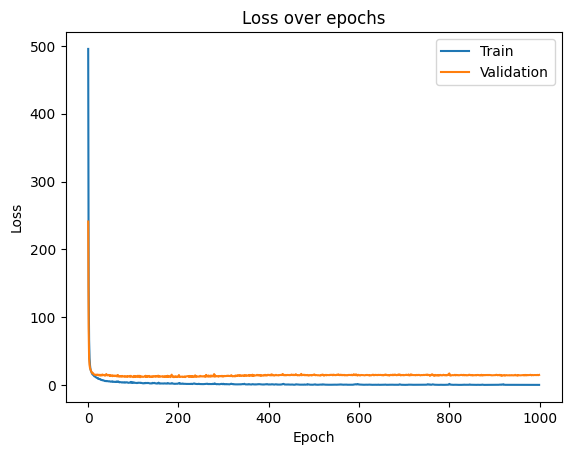

In [45]:
import neptune
from neptune_tensorflow_keras import NeptuneCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish, elu

# Инициализация Neptune
run = neptune.init_run(
    project=project, 
    api_token=api_token,
    name="Deep Adam"
)

# Подготовка данных
X_boston = df_boston.drop("MEDV", axis=1)
y_boston = df_boston["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston)

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_boston, test_size=0.2, random_state=42
)

# Построение модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='swish'),
    Dense(32, activation='elu'),
    Dense(1, activation='linear')
])

# Логирование параметров
run["parameters"] = {
    "scaler": "StandardScaler",
    "pca_components": 10,
    "test_size": 0.2,
    "optimizer": "Adam",
    "learning_rate": 0.002,
    "epochs": 1000
}

# Компиляция и логирование архитектуры
optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
run["model/summary"] = str(model.summary())

# Обучение модели с NeptuneCallback
neptune_cb = NeptuneCallback(run=run, base_namespace="training")
history = model.fit(
    X_train, y_train,
    epochs=1000,
    validation_data=(X_test, y_test),
    callbacks=[neptune_cb]
)

# Предсказания и метрики
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

run["metrics/mse"] = mse
run["metrics/r2"] = r2

# Сохранение весов
model.save_weights("regression_model.weights.h5")
run["artifacts/weights"].upload("regression_model.weights.h5")

# Сохранение всей модели
model.save("regression_model.keras")
run["artifacts/model"].upload("regression_model.keras")

# Построение и сохранение графика
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig("loss_curve.png")
run["artifacts/loss_curve"].upload("loss_curve.png")

# Завершение
run.stop()

# Вывод метрик
print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/pasharodaks/test/e/TES-28


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_29"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_105 (Dense)               │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_106 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_107 (Dense)               │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,497 (41.00 KB)

 Trainable params: 10,113 (39.50 KB)

 Non-trainable params: 384 (1.50 KB)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 583.2777 - mae: 22.7530 - val_loss: 522.3324 - val_mae: 21.3757
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 552.1926 - mae: 22.5229 - val_loss: 520.1033 - val_mae: 21.4543
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 542.1533 - mae: 22.4730 - val_loss: 517.0706 - val_mae: 21.5010
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 524.6207 - mae: 22.2691 - val_loss: 513.5590 - val_mae: 21.5185
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 510.3679 - mae: 22.0599 - val_loss: 509.7623 - val_mae: 21.5104
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 500.0447 - mae: 21.7867 - val_loss: 504.2111 - val_mae: 21.4513
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 492.2008 - mae: 21.6365 - val_loss: 498.7760 - val_mae: 21.3770
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 479.8080 - mae: 21.3809 - val_loss: 490.6418 - val_mae: 21.2469
Epoch 9

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 15 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 15 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/pasharodaks/test/e/TES-28/metadata
📉 MSE: 13.0676
📈 R²: 0.8218


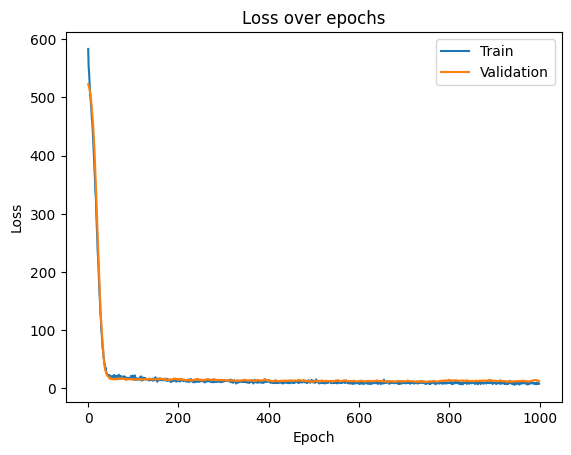

In [46]:
import neptune
from neptune_tensorflow_keras import NeptuneCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.activations import swish, elu
from tensorflow.keras.layers import Dropout, BatchNormalization

# Инициализация Neptune
run = neptune.init_run(
    project=project, 
    api_token=api_token,
    name="Dropout+BN Adam"
)

# Подготовка данных
X_boston = df_boston.drop("MEDV", axis=1)
y_boston = df_boston["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston)

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_boston, test_size=0.2, random_state=42
)

# Построение модели
model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(1, activation='linear')
])

# Логирование параметров
run["parameters"] = {
    "scaler": "StandardScaler",
    "pca_components": 10,
    "test_size": 0.2,
    "optimizer": "Adam",
    "learning_rate": 0.001,
    "epochs": 1000
}

# Компиляция и логирование архитектуры
optimizer = Adam(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
run["model/summary"] = str(model.summary())

# Обучение модели с NeptuneCallback
neptune_cb = NeptuneCallback(run=run, base_namespace="training")
history = model.fit(
    X_train, y_train,
    epochs=1000,
    validation_data=(X_test, y_test),
    callbacks=[neptune_cb]
)

# Предсказания и метрики
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

run["metrics/mse"] = mse
run["metrics/r2"] = r2

# Сохранение весов
model.save_weights("regression_model.weights.h5")
run["artifacts/weights"].upload("regression_model.weights.h5")

# Сохранение всей модели
model.save("regression_model.keras")
run["artifacts/model"].upload("regression_model.keras")

# Построение и сохранение графика
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig("loss_curve.png")
run["artifacts/loss_curve"].upload("loss_curve.png")

# Завершение
run.stop()

# Вывод метрик
print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/pasharodaks/test/e/TES-30


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_113 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_114 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_115 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_116 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_117 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,393 (75.75 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - loss: 251.0528 - mae: 12.5189 - val_loss: 34.0960 - val_mae: 4.1673
Epoch 2/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 31.5772 - mae: 4.0446 - val_loss: 29.8765 - val_mae: 4.3057
Epoch 3/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 23.3181 - mae: 3.3911 - val_loss: 20.7185 - val_mae: 2.9131
Epoch 4/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 21.4543 - mae: 3.2845 - val_loss: 19.3740 - val_mae: 2.8099
Epoch 5/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 19.2304 - mae: 3.0693 - val_loss: 26.1605 - val_mae: 4.0984
Epoch 6/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 17.2004 - mae: 2.9107 - val_loss: 16.6560 - val_mae: 2.6894
Epoch 7/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 20.3140 - mae: 3.2424 - val_loss: 16.8137 - val_mae: 2.5517
Epoch 8/1000
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 16.3885 - mae: 2.7823 - val_loss: 17.2273 - val_mae: 2.7067
Epoch 9/1000
13/13 ━━━━━━━━━━━━━━━━━━

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 95 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 95 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/pasharodaks/test/e/TES-30/metadata
📉 MSE: 15.7761
📈 R²: 0.7849


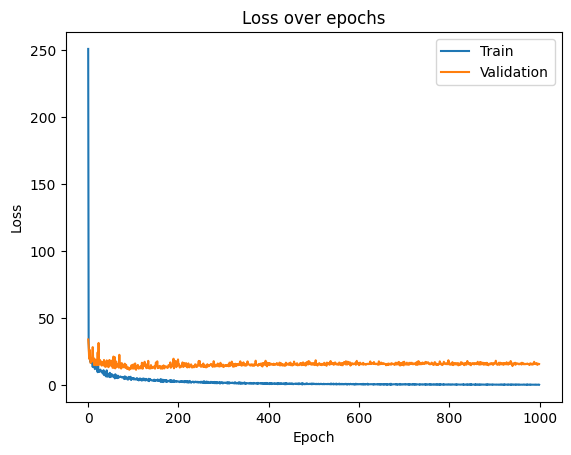

In [48]:
import neptune
from neptune_tensorflow_keras import NeptuneCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import swish, elu
from tensorflow.keras.optimizers import Adam, RMSprop, SGD


# Инициализация Neptune
run = neptune.init_run(
    project=project, 
    api_token=api_token,
    name="Deep RMSprop"
)

# Подготовка данных
X_boston = df_boston.drop("MEDV", axis=1)
y_boston = df_boston["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston)

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_boston, test_size=0.2, random_state=42
)

# Построение модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='swish'),
    Dense(32, activation='elu'),
    Dense(1, activation='linear')
])



# Логирование параметров
run["parameters"] = {
    "scaler": "StandardScaler",
    "pca_components": 10,
    "test_size": 0.2,
    "optimizer": "Adam",
    "learning_rate": 0.001,
    "epochs": 1000
}

# Компиляция и логирование архитектуры
model.compile(optimizer=RMSprop(0.002), loss='mse', metrics=['mae'])

neptune_cb = NeptuneCallback(run=run, base_namespace="training")

run["model/summary"] = str(model.summary())

# Обучение модели с NeptuneCallback
history = model.fit(
    X_train, y_train,
    epochs=1000,
    validation_data=(X_test, y_test),
    callbacks=[neptune_cb]
)

# Предсказания и метрики
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

run["metrics/mse"] = mse
run["metrics/r2"] = r2

# Сохранение весов
model.save_weights("regression_model.weights.h5")
run["artifacts/weights"].upload("regression_model.weights.h5")

# Сохранение всей модели
model.save("regression_model.keras")
run["artifacts/model"].upload("regression_model.keras")

# Построение и сохранение графика
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig("loss_curve.png")
run["artifacts/loss_curve"].upload("loss_curve.png")

# Завершение
run.stop()

# Вывод метрик
print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")


In [52]:
import neptune
from neptune_tensorflow_keras import NeptuneCallback
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, RMSprop, SGD

# Инициализация Neptune
run = neptune.init_run(
    project=project, 
    api_token=api_token,
    name="Deep SGD"
)

# Подготовка данных
df_boston = df_boston.dropna()  # удаляем строки с NaN
X_boston = df_boston.drop("MEDV", axis=1)
y_boston = df_boston["MEDV"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston)

pca = PCA(n_components=10)
X_reduced = pca.fit_transform(X_scaled)

X_train, X_test, y_train, y_test = train_test_split(
    X_reduced, y_boston, test_size=0.2, random_state=42
)

# Построение модели
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(128, activation='tanh'),
    Dense(64, activation='swish'),
    Dense(32, activation='elu'),
    Dense(1, activation='linear')
])

# Логирование параметров
run["parameters"] = {
    "scaler": "StandardScaler",
    "pca_components": 10,
    "test_size": 0.2,
    "optimizer": "SGD",
    "learning_rate": 0.001,
    "momentum": 0.9,
    "epochs": 300
}

# Компиляция и логирование архитектуры
model.compile(optimizer=SGD(learning_rate=0.001, momentum=0.9), loss='mse', metrics=['mae'])
neptune_cb = NeptuneCallback(run=run, base_namespace="training")
run["model/summary"] = str(model.summary())

# Обучение модели с NeptuneCallback
history = model.fit(
    X_train, y_train,
    epochs=300,
    validation_data=(X_test, y_test),
    callbacks=[neptune_cb]
)

# Предсказания и метрики
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

run["metrics/mse"] = mse
run["metrics/r2"] = r2

# Сохранение весов
model.save_weights("regression_model.weights.h5")
run["artifacts/weights"].upload("regression_model.weights.h5")

# Сохранение всей модели
model.save("regression_model.keras")
run["artifacts/model"].upload("regression_model.keras")

# Построение и сохранение графика
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])
plt.title("Loss over epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend(["Train", "Validation"])
plt.savefig("loss_curve.png")
plt.close()
run["artifacts/loss_curve"].upload("loss_curve.png")

# Завершение
run.stop()

# Вывод метрик
print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")


[neptune] [info   ] Neptune initialized. Open in the app: https://app.neptune.ai/pasharodaks/test/e/TES-34


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_35"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_133 (Dense)               │ (None, 64)             │           704 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_134 (Dense)               │ (None, 128)            │         8,320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_135 (Dense)               │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_136 (Dense)               │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_137 (Dense)               │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,393 (75.75 KB)

 Trainable params: 19,393 (75.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step - loss: 271.6165 - mae: 13.2562 - val_loss: 121.6075 - val_mae: 10.0967
Epoch 2/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 49.5275 - mae: 5.0629 - val_loss: 35.7617 - val_mae: 4.4623
Epoch 3/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 58.0396 - mae: 5.5889 - val_loss: 32.0372 - val_mae: 3.3881
Epoch 4/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 24.0422 - mae: 3.3244 - val_loss: 19.0369 - val_mae: 2.6214
Epoch 5/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 17.5632 - mae: 2.9356 - val_loss: 18.2405 - val_mae: 2.6872
Epoch 6/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 15.8045 - mae: 2.5657 - val_loss: 16.0675 - val_mae: 2.4808
Epoch 7/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 13.7709 - mae: 2.6058 - val_loss: 17.0861 - val_mae: 2.5729
Epoch 8/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 15.6807 - mae: 2.6519 - val_loss: 14.7928 - val_mae: 2.5211
Epoch 9/300
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
[neptune] [info   ] Shutting down background jobs, please wait a moment...
[neptune] [info   ] Done!
[neptune] [info   ] Waiting for the remaining 80 operations to synchronize with Neptune. Do not kill this process.
[neptune] [info   ] All 80 operations synced, thanks for waiting!
[neptune] [info   ] Explore the metadata in the Neptune app: https://app.neptune.ai/pasharodaks/test/e/TES-34/metadata
📉 MSE: 16.3048
📈 R²: 0.7777


In [ ]:
X_boston = df_boston.drop("MEDV",axis=1)
y_boston = df_boston["MEDV"]

# 1. Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_boston)

# 3. Разделение
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_boston, test_size=0.2, random_state=42)

# Построение модели для регрессии
model = Sequential([
    Dense(13, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='relu')
])

optimizer = Adam(learning_rate=0.002)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=500, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")

Epoch 1/500


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - loss: 564.1595 - mae: 21.6701 - val_loss: 473.3724 - val_mae: 19.7633
Epoch 2/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 521.7913 - mae: 20.6234 - val_loss: 427.9307 - val_mae: 18.6070
Epoch 3/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 463.4391 - mae: 19.1551 - val_loss: 364.6178 - val_mae: 16.9542
Epoch 4/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 380.6653 - mae: 17.1254 - val_loss: 279.8456 - val_mae: 14.6463
Epoch 5/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 276.6171 - mae: 14.2942 - val_loss: 181.0299 - val_mae: 11.6652
Epoch 6/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 165.2799 - mae: 10.8023 - val_loss: 99.6238 - val_mae: 8.5043
Epoch 7/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 87.8549 - mae: 7.6655 - val_loss: 59.9833 - val_mae: 6.0980
Epoch 8/500
13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 58.3319 - mae: 6.0909 - val_loss: 49.1270 - val_mae: 5.0806
Epoch 9/500
13/13 ━━━━━━━━━━━━━━━━━━━

In [ ]:
df_calif.shape

(20640, 10)

In [ ]:
from tensorflow.keras.optimizers import SGD, Adam, RMSprop, Adagrad, Adadelta, Nadam

df_calif = pd.get_dummies(df_calif, drop_first=True).dropna()

X_calif = df_calif.drop("median_house_value",axis=1)
y_calif = df_calif["median_house_value"]

# 1. Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_calif)

# 2. Снижение размерности
pca = PCA(n_components=5)
X_reduced = pca.fit_transform(X_scaled)

# 3. Разделение
X_train, X_test, y_train, y_test = train_test_split(X_reduced, y_calif, test_size=0.2, random_state=42)

# Построение модели для регрессии
model = Sequential([
    Dense(12, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='relu')
])
optimizer = Adam(learning_rate=0.01)
model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=250, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")

Epoch 1/250


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 30895640576.0000 - mae: 138436.1094 - val_loss: 9785037824.0000 - val_mae: 69709.9141
Epoch 2/250
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 7625086976.0000 - mae: 62195.4102 - val_loss: 7502197248.0000 - val_mae: 59702.1211
Epoch 3/250
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6450145280.0000 - mae: 56745.3281 - val_loss: 6570359296.0000 - val_mae: 56719.2969
Epoch 4/250
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 6008507392.0000 - mae: 55161.1836 - val_loss: 6208138752.0000 - val_mae: 56143.0000
Epoch 5/250
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5850243072.0000 - mae: 54704.0078 - val_loss: 6016672768.0000 - val_mae: 55495.1836
Epoch 6/250
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5799777792.0000 - mae: 54701.2578 - val_loss: 5928682496.0000 - val_mae: 55095.4609
Epoch 7/250
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 5777781760.0000 - mae: 54514.3008 - val_loss: 5892151808.0000 - val_mae: 55802.

In [ ]:
df_calif = pd.get_dummies(df_calif, drop_first=True).dropna()
X_calif = df_calif.drop("median_house_value",axis=1)
y_calif = df_calif["median_house_value"]

# 1. Масштабирование
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_calif)

# 3. Разделение
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_calif, test_size=0.2, random_state=42)

# Построение модели для регрессии
model = Sequential([
    Dense(13, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(64, activation='relu'),
    Dense(1, activation='relu')
])

model.compile(optimizer='Nadam', loss='mean_squared_error', metrics=['mae'])
model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test))
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"📉 MSE: {mse:.4f}")
print(f"📈 R²: {r2:.4f}")

Epoch 1/100


c:\Users\DELL\Desktop\tms\.venv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


511/511 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - loss: 55804702720.0000 - mae: 206365.1094 - val_loss: 56254197760.0000 - val_mae: 206562.3594
Epoch 2/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 53782929408.0000 - mae: 202180.5000 - val_loss: 52252188672.0000 - val_mae: 198288.3594
Epoch 3/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 47541731328.0000 - mae: 188608.7969 - val_loss: 43669176320.0000 - val_mae: 179089.3281
Epoch 4/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 37485973504.0000 - mae: 164275.0469 - val_loss: 32425988096.0000 - val_mae: 150422.7812
Epoch 5/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 26552530944.0000 - mae: 133484.8906 - val_loss: 22198030336.0000 - val_mae: 119836.3125
Epoch 6/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 18064529408.0000 - mae: 106024.0234 - val_loss: 15553907712.0000 - val_mae: 97337.8047
Epoch 7/100
511/511 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13377941504.0000 - mae: 89478.6641 - val_loss: 12499146752